# tvAR2
# Uniform Kernel
# Increasing T
# Fixed t=50

In [1]:
import sys
import os

sys.path.append(os.path.abspath('D:/ExperimentsPhD/wasslsp/Jan_Experiments'))

In [2]:
import numpy as np
import scipy as scp

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#from src.utils import *
from src.kernels import Kernel

import warnings
warnings.filterwarnings('ignore')

# T=100

In [3]:
T = 100
n_replications = 200
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

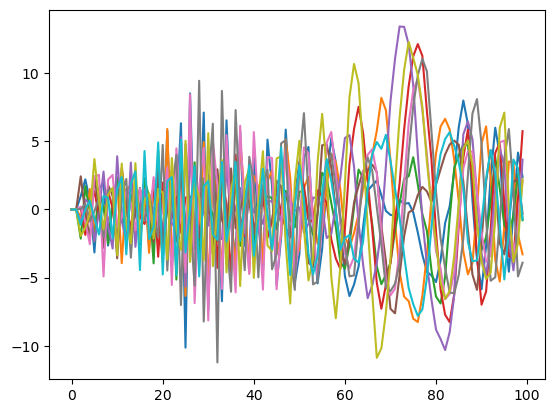

In [4]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [5]:
X_dict.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [6]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

In [7]:
X_tvar_2_replications.shape

(200, 100)

In [8]:
X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

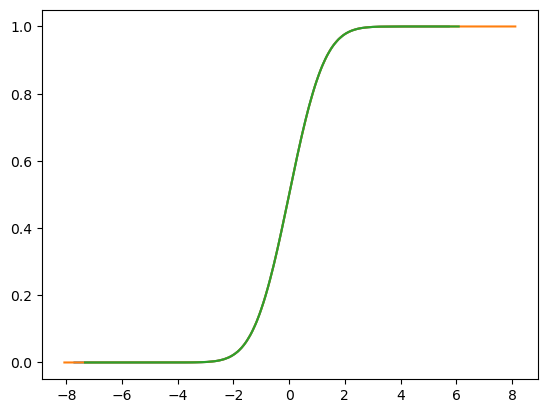

In [9]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [10]:
## uniform 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
t = 50
uniform_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="uniform", time_kernel="uniform")

uniform_weights = {}
uniform_weights_ = {}
for replication in range(n_replications):
    uniform_weights[str(replication)] = uniform_kernel.fit(X_dict[str(replication)],t)
    uniform_weights_[str(replication)] = uniform_weights[str(replication)].sum(axis=0)

In [11]:
weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = uniform_weights[str(replication)] 
    weights_20[str(replication)] = uniform_weights[str(replication)]
    weights_50[str(replication)] = uniform_weights[str(replication)]


In [12]:
weights_50['0'].shape

(100,)

In [115]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

,0
0,6.748839e-13
1,6.810853e-13
2,6.872167e-13
3,1.686782e-17
4,3.163619e-24
5,1.382066e-16
6,4.826541e-03
7,3.249323e-26
8,5.025170e-23
9,1.079069e-04


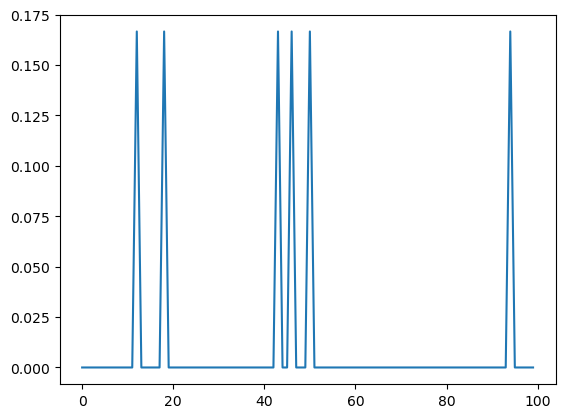

In [14]:
plt.plot(weights_50['1'])

In [15]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

In [16]:
weights_50['0'].shape

(100,)

In [17]:
replicated_NW_cdfs_50['0'].shape

(100,)

<Axes: >

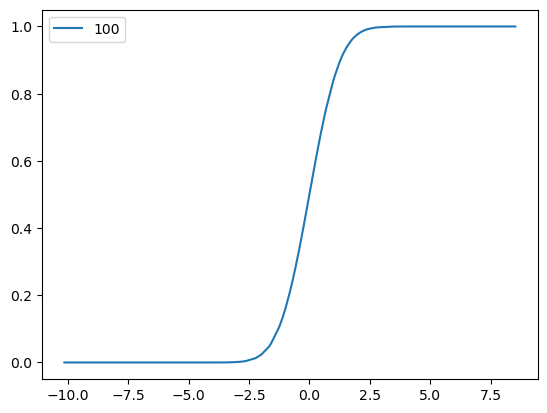

In [18]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

In [19]:
def eval_univariate(x, weights):
        """Inner function for ECDF of one variable."""
        sorter = x.argsort()
        x = x[sorter]
        weights = weights[sorter]
        y = weights.cumsum()

        # if self.stat in ["percent", "proportion"]:
        y = y / y.max()
        # if self.stat == "percent":
            # y = y * 100

        # x = np.r_[-np.inf, x]
        # y = np.r_[0, y]
        x = np.r_[x]
        y = np.r_[y]

        # if self.complementary:
            # y = y.max() - y

        return y, x

(200, 100) (200, 100)


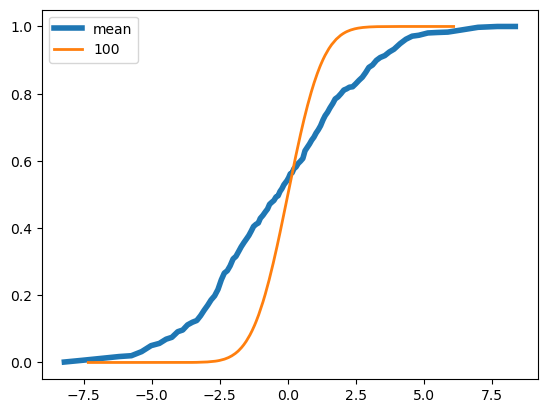

Wasserstein distance for each replication:  [0.32121133425163767, 0.1224333003982801, 0.0941599320056452, 0.17140261265122098, 0.15061525098588469, 0.16793561429166814, 0.2650114848915541, 0.23329389326284017, 0.3007119202320058, 0.25285414162779263, 0.3102456007842678, 0.11564934293004259, 0.11051968073954174, 0.23164426014975095, 0.46009434738634913, 0.41990759604488503, 0.16492701771113766, 0.2450114848915541, 0.1789328249090654, 0.1952081818114773, 0.14505255826538302, 0.19209276054717617, 0.15771803083599678, 0.0647210293884368, 0.17478486702521262, 0.18048394522167227, 0.15682179024589893, 0.27404871364368333, 0.15013598034648032, 0.2952239026007335, 0.389915427489696, 0.159439554016658, 0.23609659939013072, 0.15403967929972984, 0.3532405779306811, 0.2481844262469095, 0.31365039547483564, 0.43009277135933854, 0.5300927556393542, 0.1537113342516376, 0.29224560078426787, 0.18368474475782542, 0.14585750978074835, 0.19854476894068007, 0.1908781300126898, 0.13976299935796904, 0.245333

In [20]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [21]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

In [22]:
from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.11879009255364559

In [23]:
1 / (T**.5 *bandwith**(d+1))  + bandwith

0.9868308976105993

# T=500

In [23]:
T = 500
n_replications = 200
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

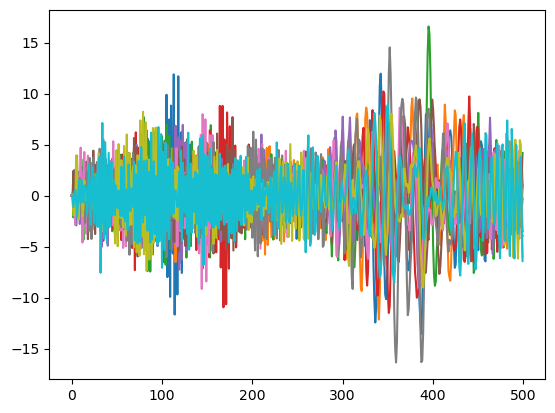

In [24]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [25]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

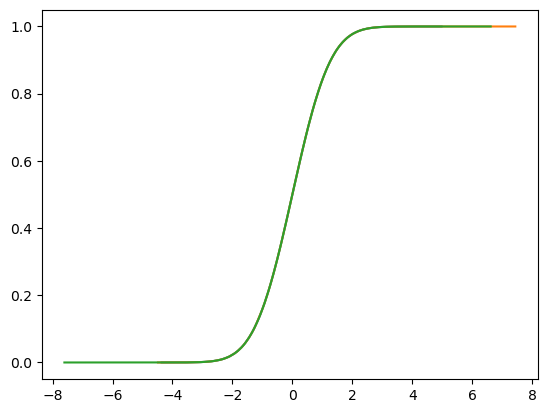

In [128]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [27]:
## uniform 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
t = 50
uniform_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="uniform", time_kernel="uniform")

uniform_weights = {}
uniform_weights_ = {}
for replication in range(n_replications):
    uniform_weights[str(replication)] = uniform_kernel.fit(X_dict[str(replication)], 50)
    uniform_weights_[str(replication)] = uniform_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = uniform_weights[str(replication)] 
    weights_20[str(replication)] = uniform_weights[str(replication)]
    weights_50[str(replication)] = uniform_weights[str(replication)]


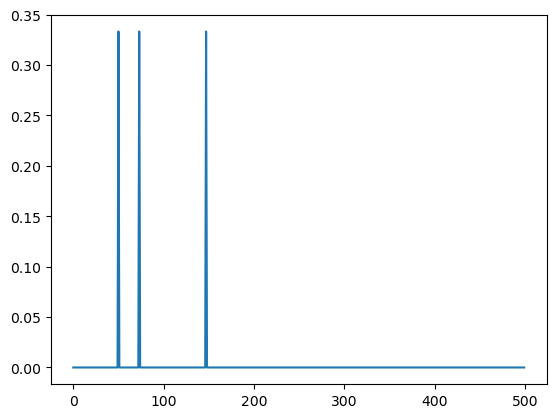

In [28]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(weights_50['0'])

In [29]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

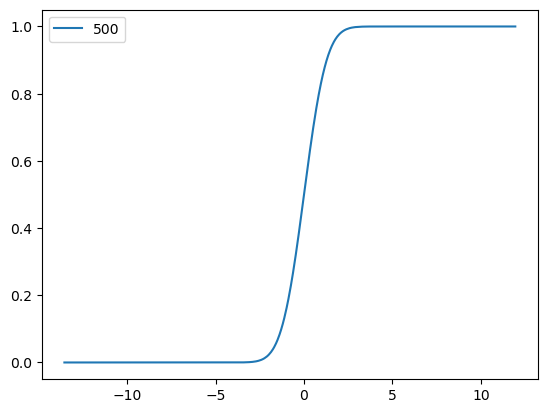

In [30]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(200, 500) (200, 500)


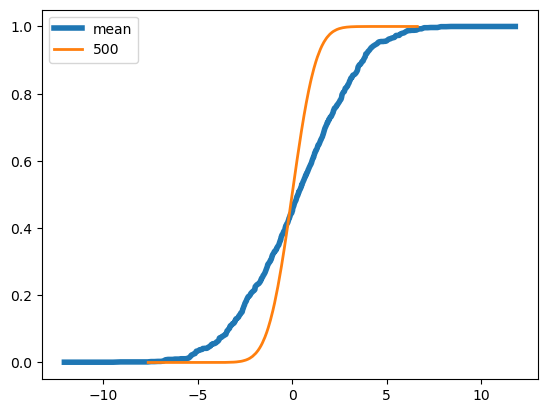

Wasserstein distance for each replication:  [0.16494130411683156, 0.12097336135941845, 0.25048709498556815, 0.09751425982419891, 0.2367552949842933, 0.15817220985423738, 0.11501013837274927, 0.24366861206761953, 0.14756492162513365, 0.08112603126150772, 0.10933710254311006, 0.28684826627001175, 0.1783052802940875, 0.160013945617682, 0.05599956577704075, 0.35692968980603634, 0.15892541112508896, 0.19472134718373324, 0.17851478950509822, 0.2372256683346956, 0.06519630066585967, 0.16429530187957264, 0.3597847332639002, 0.158540620068573, 0.2752371441841363, 0.0843109714704822, 0.04999388122285611, 0.2401514468720715, 0.1633846021082676, 0.32673708301376225, 0.1572455477296793, 0.1700242138258241, 0.027521010443992255, 0.4042676419563869, 0.1621520414764012, 0.20842171677014104, 0.2891243986648138, 0.14036017715106477, 0.18253074482206266, 0.3190336170913263, 0.0868561018785528, 0.30716572658747204, 0.15880396645036654, 0.11931791968874236, 0.35749096368991284, 0.21712967337699665, 0.26009

In [31]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [32]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.11290317501291604

# T=1000

In [33]:
T = 1000
n_replications = 200
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

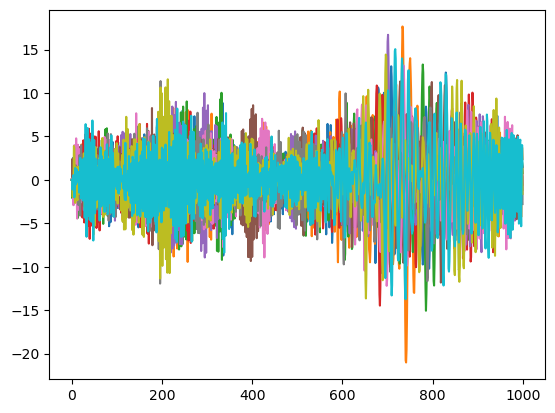

In [34]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [35]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

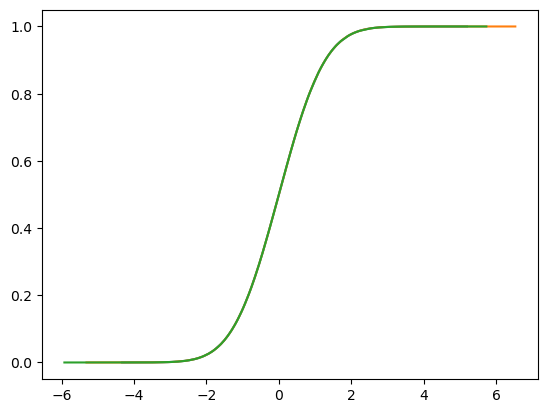

In [36]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [37]:
## uniform 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
t = 50
uniform_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="uniform", time_kernel="uniform")

uniform_weights = {}
uniform_weights_ = {}
for replication in range(n_replications):
    uniform_weights[str(replication)] = uniform_kernel.fit(X_dict[str(replication)], t)
    uniform_weights_[str(replication)] = uniform_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = uniform_weights[str(replication)] 
    weights_20[str(replication)] = uniform_weights[str(replication)]
    weights_50[str(replication)] = uniform_weights[str(replication)]


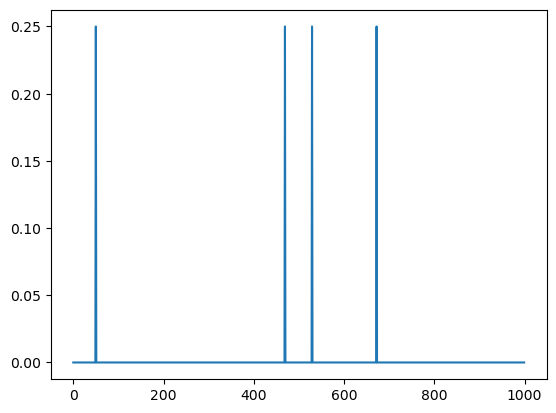

In [38]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(weights_50['0'])

In [39]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

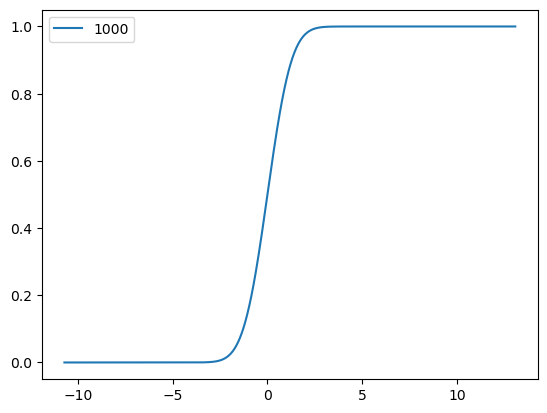

In [40]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(200, 1000) (200, 1000)


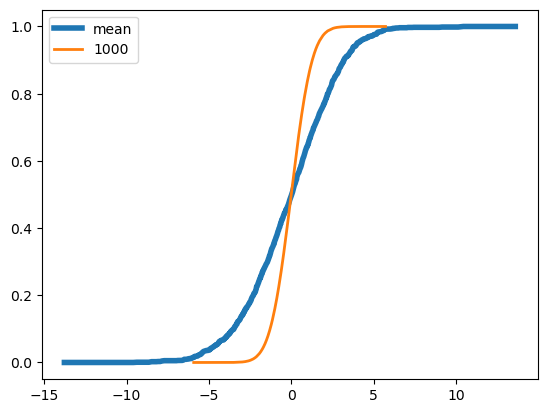

Wasserstein distance for each replication:  [0.13775775809298452, 0.2968745605115368, 0.16680310766393877, 0.10947295943021462, 0.0947560380144907, 0.034876486636650925, 0.1437179901174223, 0.1449025708293301, 0.2415341797751221, 0.32592566661820177, 0.045278978268471895, 0.13928783943319514, 0.38837583775924234, 0.1867637551145907, 0.1327277558230168, 0.032154861307639296, 0.058336639411861124, 0.17263704512793024, 0.26689764519961023, 0.07371202109691846, 0.0818999645033249, 0.03772777484497411, 0.10477346016145048, 0.10722190480593669, 0.07849920537624458, 0.13994493180628392, 0.2036306019358209, 0.2725339854184013, 0.159896037346221, 0.2725421379058265, 0.18241973589024021, 0.14060479978406837, 0.1668001519161263, 0.2055061544546257, 0.12239819152226951, 0.08525038128224832, 0.09812123859132857, 0.3054658558388959, 0.04701801938330563, 0.08859208865936125, 0.17627786881009275, 0.1686255513892314, 0.241746952297558, 0.16423419617128535, 0.11910673413521784, 0.24880887778121683, 0.13

In [41]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [42]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.09907422708060402

# T=1500

In [43]:
T = 1500
n_replications = 200
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

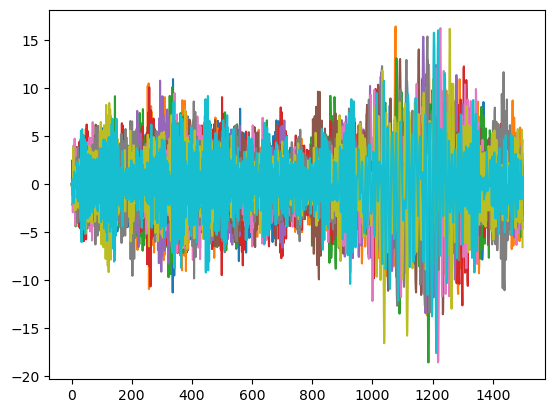

In [44]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [45]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

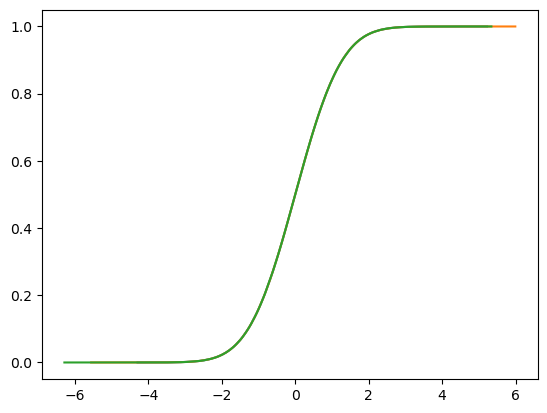

In [46]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [47]:
## uniform 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
t = 50
uniform_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="uniform", time_kernel="uniform")

uniform_weights = {}
uniform_weights_ = {}
for replication in range(n_replications):
    uniform_weights[str(replication)] = uniform_kernel.fit(X_dict[str(replication)], t)
    uniform_weights_[str(replication)] = uniform_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = uniform_weights[str(replication)] 
    weights_20[str(replication)] = uniform_weights[str(replication)]
    weights_50[str(replication)] = uniform_weights[str(replication)]


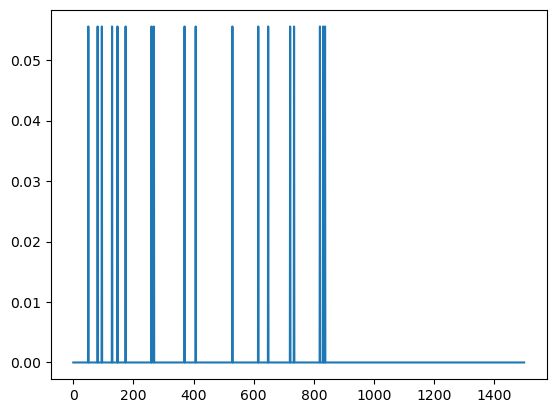

In [48]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(weights_50['0'])

In [49]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

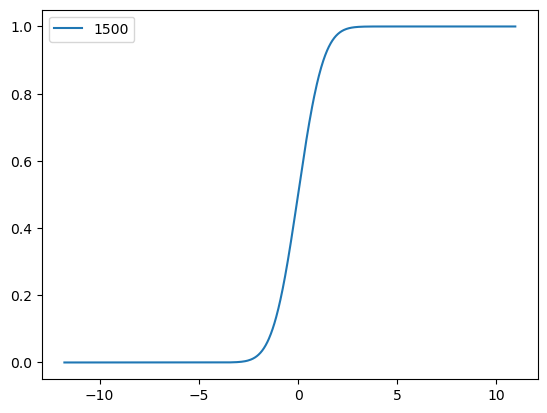

In [50]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(200, 1500) (200, 1500)


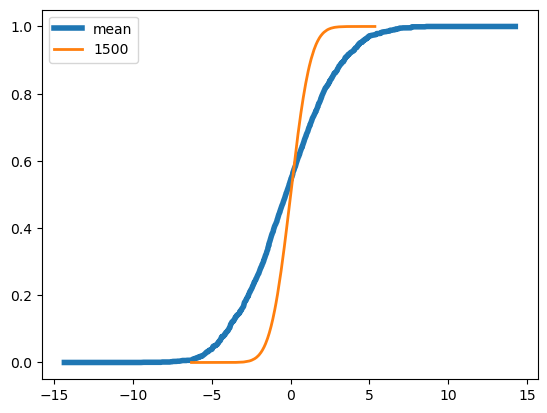

Wasserstein distance for each replication:  [0.15806606053395064, 0.16521913121733817, 0.18810660436032386, 0.38997175878662815, 0.31061232080143997, 0.10081867194777434, 0.11365129446570865, 0.17856467005132165, 0.32408856890579174, 0.32086075482678494, 0.05783721872874954, 0.17674195243985086, 0.4019716954042344, 0.2453402166855082, 0.21536184999663988, 0.18236018023951206, 0.41385201547228045, 0.07461984272188603, 0.3539542870571507, 0.08026926555933732, 0.23665612233367242, 0.14363888415138065, 0.055635232530081534, 0.24582866615767393, 0.23112771832156792, 0.146269556850884, 0.18995143662686753, 0.3469210461162042, 0.33619610518276105, 0.2382531754985346, 0.2174945789845294, 0.21675543570266015, 0.4072512780148706, 0.42269508499326963, 0.046385557456308776, 0.3952507997126626, 0.07251438907135485, 0.10684671524219318, 0.2797624541819865, 0.22439728894091815, 0.08206864839779418, 0.21963080872416477, 0.13598871663598341, 0.12785200971448188, 0.08141544197937246, 0.295076337663579, 

In [51]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [52]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.1169619095021297

# T=2000

In [53]:
T = 2000
n_replications = 200
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

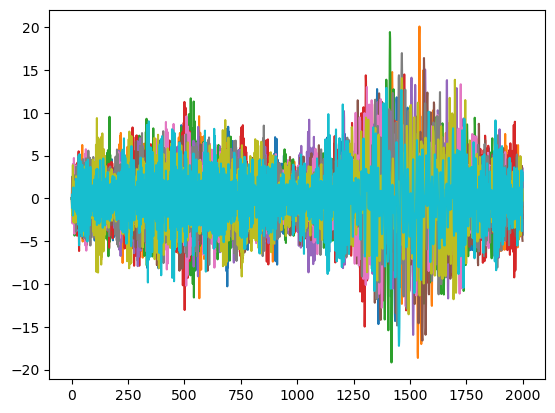

In [54]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [55]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

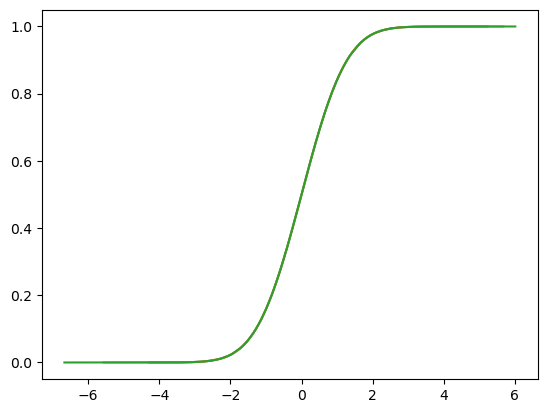

In [56]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [57]:
## uniform 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
t = 50
uniform_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="uniform", time_kernel="uniform")

uniform_weights = {}
uniform_weights_ = {}
for replication in range(n_replications):
    uniform_weights[str(replication)] = uniform_kernel.fit(X_dict[str(replication)], t)
    uniform_weights_[str(replication)] = uniform_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = uniform_weights[str(replication)] 
    weights_20[str(replication)] = uniform_weights[str(replication)]
    weights_50[str(replication)] = uniform_weights[str(replication)]


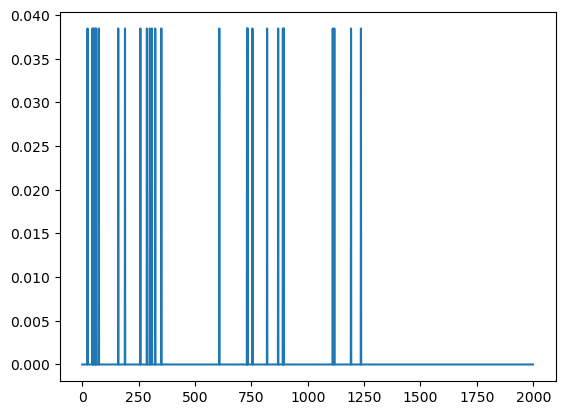

In [58]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(weights_50['0'])

In [59]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

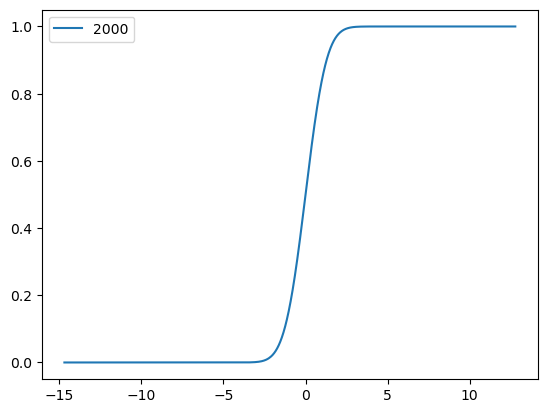

In [60]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(200, 2000) (200, 2000)


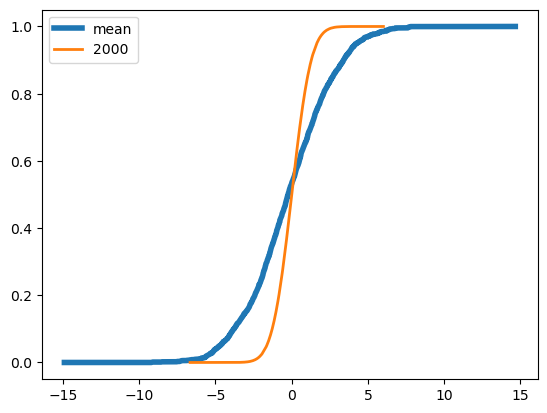

Wasserstein distance for each replication:  [0.07351677854343418, 0.24551929515039822, 0.16860890941828535, 0.27170818403928715, 0.30763391432239723, 0.2044064858302908, 0.08391546008397432, 0.23623467440980397, 0.2818766418394093, 0.19092903762678023, 0.08818549238368534, 0.11468307275309081, 0.2646939943058498, 0.29185297118450115, 0.12530530644032747, 0.18901017688176247, 0.15979545251095587, 0.12062377432255358, 0.2025963146322334, 0.11378794720281878, 0.37883201712878356, 0.17705474901206364, 0.1219805328911684, 0.347864865666599, 0.17080218304209308, 0.16282120982085757, 0.18874303883208085, 0.3284510246626827, 0.15452181801308568, 0.1426204313420127, 0.1403652787670384, 0.13980185014266316, 0.1827769960007863, 0.28856866229518124, 0.07469329639189384, 0.26508586415661656, 0.10099797102650127, 0.028957730050667777, 0.32598104972598324, 0.18530978665473066, 0.02352175307956056, 0.08259468292805479, 0.11274040717490783, 0.09184209711864261, 0.0609080592573764, 0.2967399794704103, 0

In [61]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [62]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.11142180808006268

# T=5000

In [63]:
T = 5000
n_replications = 200
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

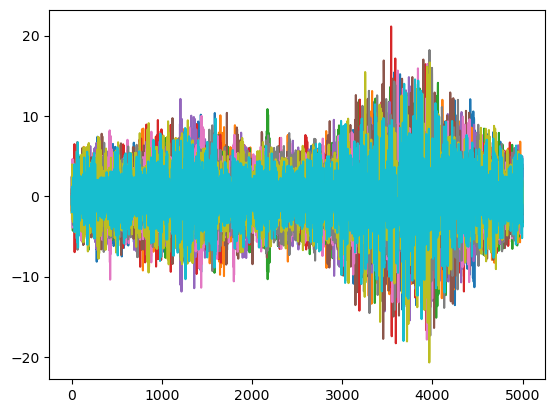

In [64]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [65]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

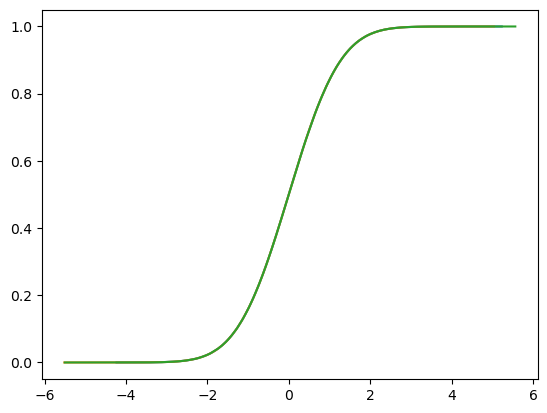

In [66]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [67]:
## uniform 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
t = 50
uniform_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="uniform", time_kernel="uniform")

uniform_weights = {}
uniform_weights_ = {}
for replication in range(n_replications):
    uniform_weights[str(replication)] = uniform_kernel.fit(X_dict[str(replication)], t)
    uniform_weights_[str(replication)] = uniform_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = uniform_weights[str(replication)] 
    weights_20[str(replication)] = uniform_weights[str(replication)]
    weights_50[str(replication)] = uniform_weights[str(replication)]


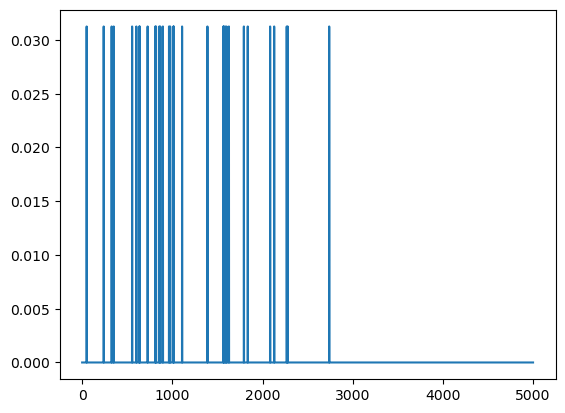

In [69]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(weights_50['1'])

In [70]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

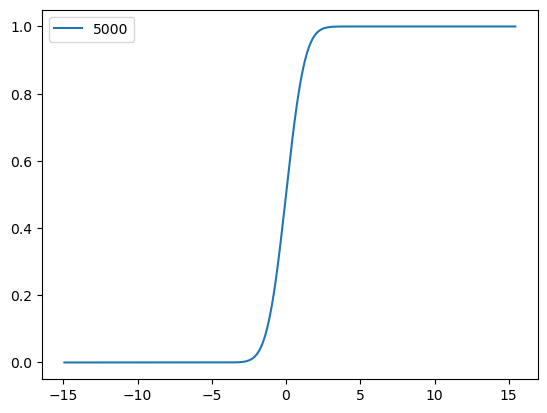

In [71]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(200, 5000) (200, 5000)


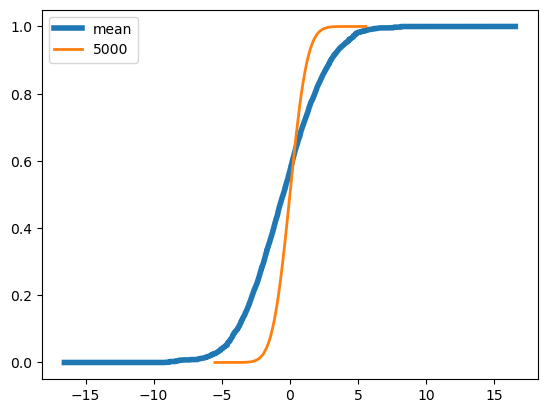

Wasserstein distance for each replication:  [0.04133482333669747, 0.13410192093584145, 0.2876438389975625, 0.21854456312124104, 0.21234803450165943, 0.24912187572911476, 0.1673359656268868, 0.20270149131725573, 0.4182669533579751, 0.05634604939667201, 0.1384409490095795, 0.11115736303952481, 0.25722895285930647, 0.25790714568756185, 0.12634262179429323, 0.12463734612475583, 0.16325576674170839, 0.44191847936773904, 0.17254283245027321, 0.20711474592004073, 0.1748125742078243, 0.20462065506715443, 0.08334804357157932, 0.30056385042372463, 0.047237346464559446, 0.10381172159406761, 0.15701666787757607, 0.24483714458769898, 0.19076499091558805, 0.20302177390152748, 0.07809324592512429, 0.2874601474651215, 0.2883640071834011, 0.0649826288157746, 0.287493740365004, 0.16042499988095865, 0.22818646877059945, 0.05333288265764363, 0.3304931552048527, 0.16700638048627986, 0.03519624952976461, 0.20437741131292975, 0.11835319230544777, 0.1055226239442585, 0.19820539939910514, 0.18144028787167077, 

In [72]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [73]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.09738905322481778

# T=10000

In [74]:
T = 10000
n_replications = 200
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    np.random.seed(replication)
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

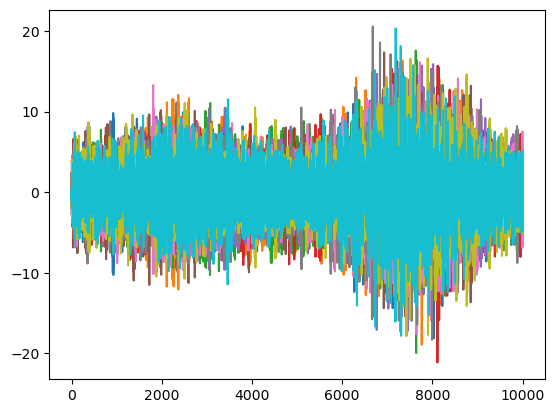

In [75]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [76]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

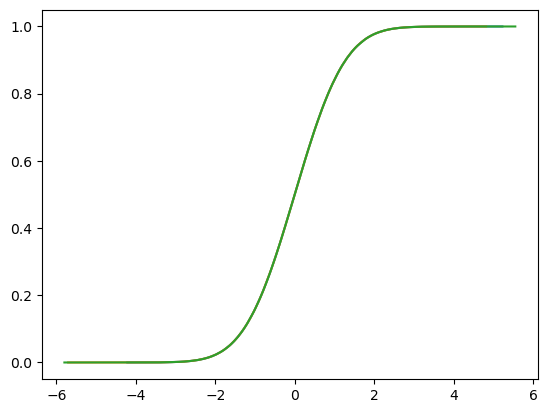

In [77]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [78]:
## uniform 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
t = 50
uniform_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="uniform", time_kernel="uniform")

uniform_weights = {}
uniform_weights_ = {}
for replication in range(n_replications):
    uniform_weights[str(replication)] = uniform_kernel.fit(X_dict[str(replication)], t)
    uniform_weights_[str(replication)] = uniform_weights[str(replication)].sum(axis=0)
    

weights_10 = {}
weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    weights_10[str(replication)] = uniform_weights[str(replication)] 
    weights_20[str(replication)] = uniform_weights[str(replication)]
    weights_50[str(replication)] = uniform_weights[str(replication)]


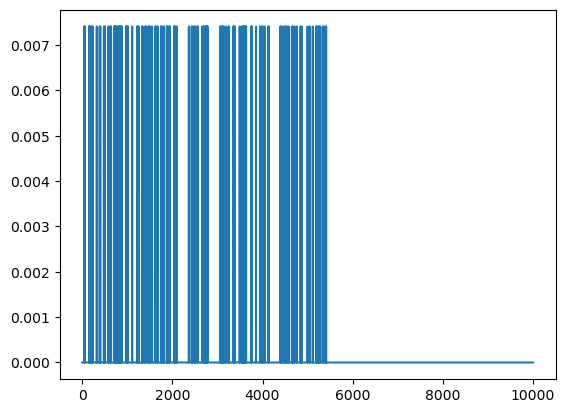

In [79]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

plt.plot(weights_50['0'])

In [81]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

<Axes: >

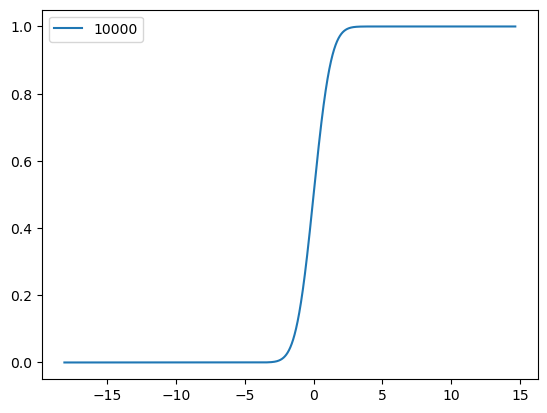

In [82]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

(200, 10000) (200, 10000)


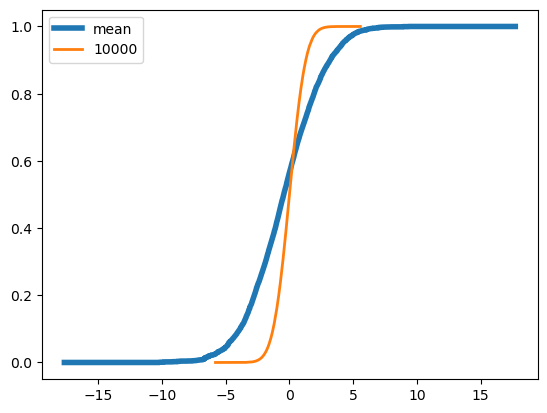

Wasserstein distance for each replication:  [0.02230857975257647, 0.08646038800644079, 0.3197813623842441, 0.19855161892887502, 0.16110588892074668, 0.20706548953091847, 0.27720160710777114, 0.10432451566817813, 0.40598556853831425, 0.07216594483646038, 0.04793084994671715, 0.01590389573711507, 0.23536489747736006, 0.13446131460308564, 0.05238197637123564, 0.10423444077557584, 0.3504801016820306, 0.44242698536334746, 0.206836235756158, 0.24257086906720848, 0.07100983018190975, 0.36310722493534275, 0.03460955259826196, 0.2945138759061572, 0.058780780346963754, 0.062401851963191604, 0.029942216102829766, 0.1978506743344705, 0.053903435849229624, 0.02880891169932154, 0.18191571200150702, 0.2602386071770292, 0.35007966098595766, 0.0436618660376597, 0.4135893319740758, 0.05587519599689604, 0.15416792891626024, 0.1615774037292085, 0.32903858360878213, 0.21611528594433857, 0.0664376260632549, 0.25178376908939626, 0.06249933042433732, 0.0954584859578204, 0.2527322129953292, 0.10091386154352136

In [83]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [84]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.09637562779670703